In [1]:
import torch
from ConditionalMNIST import load_mnist, get_observation_pixels
import numpy as np
import matplotlib.pyplot as plt

BATCH_SIZE = 128
train_loader, test_loader, val_loader = load_mnist(BATCH_SIZE)

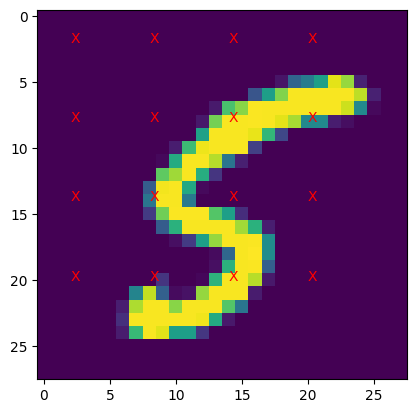

In [2]:
example = next(iter(test_loader))[0][0][0].numpy()
plt.imshow(example)
# print on top of the image the observation pixels
obs_x, obs_y = get_observation_pixels()
for i in range(len(obs_x)):
    plt.text(obs_x[i], obs_y[i], 'X', color='red')
plt.show()

In [3]:
import pytorch_lightning as pl
from SCVAE import ConditionalVAE

class SCVAE(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.ConditionalVAE = ConditionalVAE()
    
    def forward(self, x):
        return self.ConditionalVAE(x)
    
    def training_step(self, batch, batch_idx):
        x, x_cond, y = batch
        output, z_mean, z_log_var, z = self.ConditionalVAE(x, x_cond)
        recon_loss, kl_loss, loss = self.ConditionalVAE.loss(x, output, z_mean, z_log_var)
        self.log('train_loss', loss)
        self.log('train_recon_loss', recon_loss)
        self.log('train_kl_loss', kl_loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, x_cond, y = batch
        output, z_mean, z_log_var, z = self.ConditionalVAE(x, x_cond)
        recon_loss, kl_loss, loss = self.ConditionalVAE.loss(x, output, z_mean, z_log_var)
        self.log('val_loss', loss)
        self.log('val_recon_loss', recon_loss)
        self.log('val_kl_loss', kl_loss)
        return loss
    
    def test_step(self, batch, batch_idx):
        x, x_cond, y = batch
        output, z_mean, z_log_var, z = self.ConditionalVAE(x, x_cond)
        recon_loss, kl_loss, loss = self.ConditionalVAE.loss(x, output, z_mean, z_log_var)
        self.log('test_loss', loss)
        self.log('test_recon_loss', recon_loss)
        self.log('test_kl_loss', kl_loss)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)
    

In [4]:
from pytorch_lightning.callbacks import RichProgressBar
scvae = SCVAE()
trainer = pl.Trainer(accelerator='gpu', devices=1, max_epochs=5, enable_progress_bar=True, callbacks=[RichProgressBar()])
trainer.fit(scvae, train_loader, val_loader)
#save
trainer.save_checkpoint('scvae.ckpt')

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Image size:  (1, 28, 28)


┏━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name           ┃ Type           ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ ConditionalVAE │ ConditionalVAE │ 10.7 M │
└───┴────────────────┴────────────────┴────────┘

Trainable params: 10.7 M                                                                                           
Non-trainable params: 0                                                                                            
Total params: 10.7 M                                                                                               
Total estimated model params size (MB): 42

Output()

/opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [37,0,0], thread: [0,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [37,0,0], thread: [1,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [37,0,0], thread: [2,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [37,0,0], thread: [3,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/opt/conda/conda-bld/pytorch_1670525552843/work/aten/src/ATen/native/cuda/Loss.cu:92: operator(): block: [37,0,0], thread: [5,0,0] Assertion `input_val >= zero && input_val <= one` failed.
/opt/conda/conda-bld/pytorch_1670525552843/work/aten/sr

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.